<body style="display:inline-block">
    <img src="https://miro.medium.com/max/487/1*TkjDikCWifEtUtvomQr4sg.jpeg" width="200px" height="200px" align="left">
    <img src="https://avatars3.githubusercontent.com/u/30696987?s=280&v=4" width="180px" height="180px" align="right">    
</body>    

<p style="font-family: 'Optima', sans-serif; font-size:30px">An introduction to quantum machine learning with QISkit aqua</p>
<br>

<p style="font-family: 'Optima', sans-serif; font-size:20px">Experimenting with Quantum Support Vector Machines</p><br>

<p style="font-family: 'Optima', sans-serif; font-size:18px">Importing the Data</p>

<p style="font-family: 'Optima', sans-serif; font-size:14px">The data we'll be using is present in the data.py file that came along with this notebook:</p>

In [6]:
from data import trainingData, testData, predData, classMappings

<p style="font-family: 'Optima', sans-serif; font-size:14px">We can plot some of the data we just imported to see what it looks like:</p>

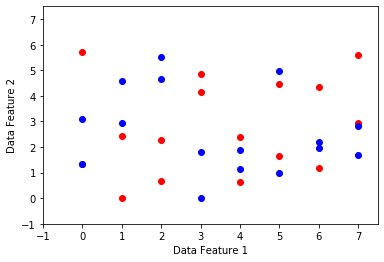

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set(xlabel='Data Feature 1', ylabel='Data Feature 2')

plt.plot(trainingData['red'], 'ro')
plt.plot(trainingData['blue'], 'bo')
plt.axis([-1, 7.5, -1, 7.5])

plt.show()

<p style="font-family: 'Optima', sans-serif; font-size:14px">Just by looking at the data, it is obvious that no hyperplane can be used to accurately classify the data, so we need to use the kernel trick, which we will do with aqua's QSVM algorithm.</p>

<p style="font-family: 'Optima', sans-serif; font-size:18px">Importing required Aqua modules</p>

<p style="font-family: 'Optima', sans-serif; font-size:14px">We need to import all the modules from aqua that we will be using:</p>

In [3]:
from qiskit import Aer
from qiskit.aqua import run_algorithm, QuantumInstance
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.feature_maps import SecondOrderExpansion

<p style="font-family: 'Optima', sans-serif; font-size:18px">Building the SVM</p>

<p style="font-family: 'Optima', sans-serif; font-size:14px">Since we are using aqua, we don't have to worry about the actual (i.e. gate level) implementation of the algorithms we use, we can just call them using the qiskit API:</p>

In [8]:
seed = 10598

featureMap = SecondOrderExpansion(feature_dimension=2, depth=2, entanglement='linear')

qsvm = QSVM(featureMap, trainingData, testData, predData[0])

<p style="font-family: 'Optima', sans-serif; font-size:18px">Running the qiskit job</p>

To execute the circuits we built, we need to use one of qiskit aer's backends, and aqua's QuantumInstance function:

In [ ]:
backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

result = qsvm.run(quantum_instance)

<p style="font-family: 'Optima', sans-serif; font-size:18px">Model performance</p>

<p style="font-family: 'Optima', sans-serif; font-size:14px">aqua also provides us with a super easy way to analyse model performance through the result object:</p>

In [ ]:
print("Testing success ratio: {}".format(result['testing_accuracy']))

print("Prediction of datapoints:")
print("Ground Truth: {}".format(list(predData[1])))
print("Prediction:   {}".format(list(map(lambda x: 1 if x == 'blue' else 0, result['predicted_classes']))))

import numpy as np

kernel_matrix=result('kernel_matrix_training')
img=plt.imshow(np.asmatrix(kernel_matrix),interpolation ='nearest',origin='upper',cmap='seismic')
plt.show()